In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,classification_report
from sklearn.svm import SVC

In [5]:
df=pd.read_csv(r"C:\Users\bhanu\OneDrive\Documents\ML_LAB\ML_CIA2_labexam\ML_CIA2_labexam\ex3\Dry_Bean_Dataset.csv")
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [8]:
x=df.drop('Class',axis=1)
y=df['Class']

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

              precision    recall  f1-score   support

    BARBUNYA       0.67      0.52      0.59       261
      BOMBAY       0.00      0.00      0.00       117
        CALI       0.60      0.49      0.54       317
    DERMASON       0.86      0.84      0.85       671
       HOROZ       0.87      0.86      0.86       408
       SEKER       0.81      0.84      0.82       413
        SIRA       0.77      0.76      0.77       536

    accuracy                           0.72      2723
   macro avg       0.65      0.62      0.63      2723
weighted avg       0.75      0.72      0.73      2723



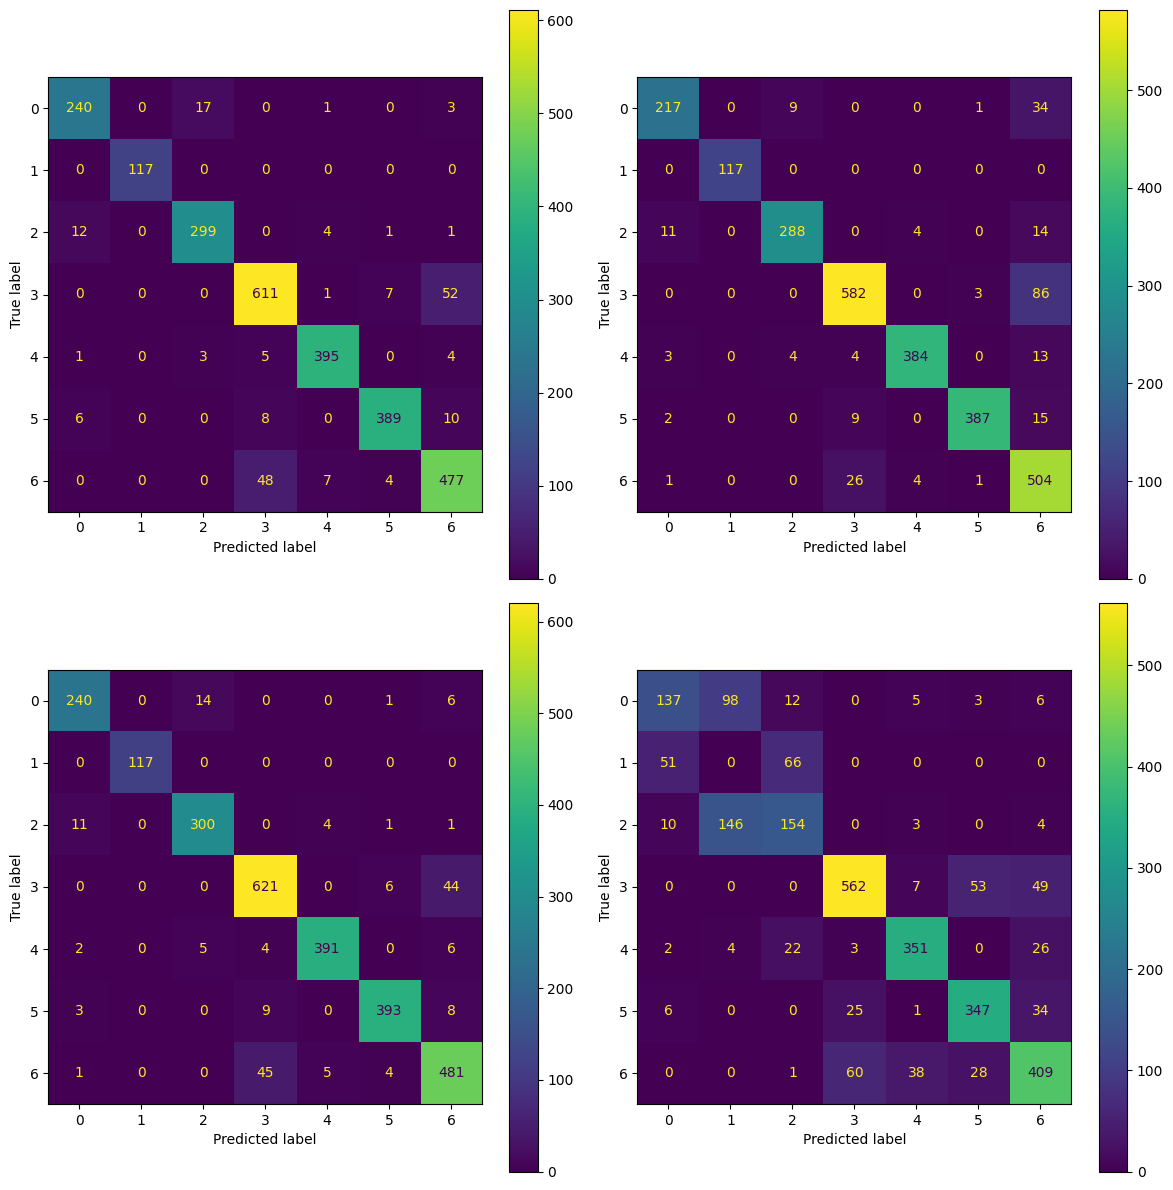

In [14]:
kernels=['linear','poly','rbf','sigmoid']

fig,axes=plt.subplots(2,2,figsize=(12,12))
axes=axes.ravel()
print(classification_report(y_test,y_pred))
for i, kernel in enumerate(kernels):
    model=SVC(kernel=kernel,random_state=42)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    cm=confusion_matrix(y_test,y_pred)
    display=ConfusionMatrixDisplay(cm)
    display.plot(ax=axes[i])

plt.tight_layout()
plt.show()
    
    

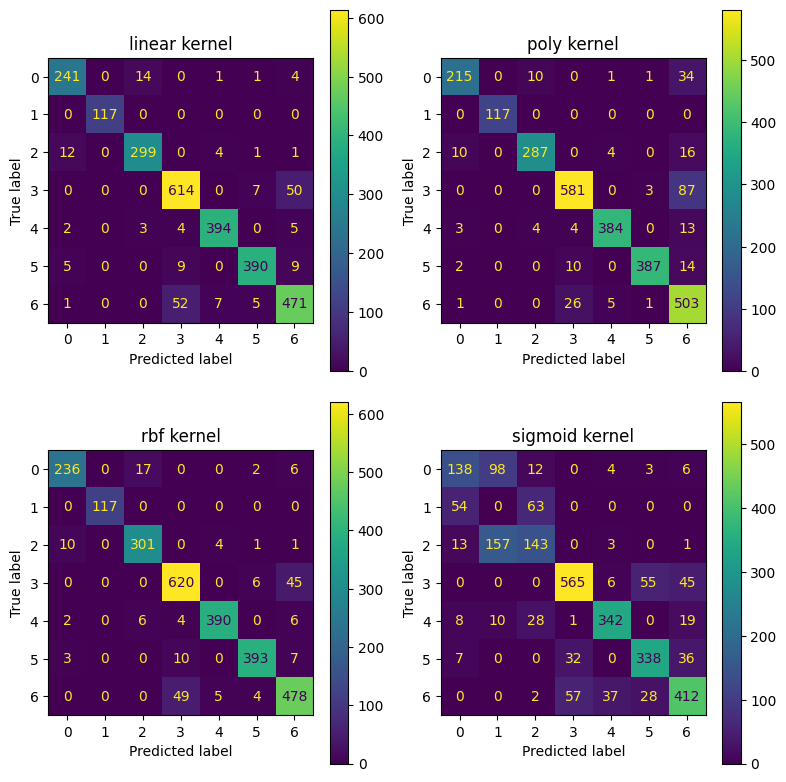

In [15]:
from sklearn.decomposition import PCA


# Standardize data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Apply PCA
pca = PCA(n_components=5)  # Adjust n_components as needed
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

# Define kernels and set up subplots
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes = axes.ravel()

# Train and plot for each kernel
for i, kernel in enumerate(kernels):
    model = SVC(kernel=kernel, random_state=42)
    model.fit(x_train_pca, y_train)
    y_pred = model.predict(x_test_pca)
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot(ax=axes[i])
    axes[i].set_title(f'{kernel} kernel')

plt.tight_layout()
plt.show()